# Million Song Dataset Analysis

*Moses Surumen, Ellen Peng, Kuhuk Goyal*  
*CS 194-31  Final Project*  
*Project Name: Music Networks*

---

## Introduction

The **Million Song Dataset (MSD)** is a freely-available collection of audio features and metadata for a million contemporary popular music tracks. It contains track, song, artist, and album metadata as well as artist similarity and artist tags. The data is stored in HDF5 format, with one file per song.

The dataset was created using the [**Echo Nest**](http://the.echonest.com/) API. More information on the dataset can be found [here](http://labrosa.ee.columbia.edu/millionsong/).


---

In [1]:
# Pandas
import pandas as pd

# Graph
import community
import networkx as nx

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Combinations
import itertools

---
##  Dataset Format

| Column        | Description                            | Format
| :------------ |--------------------------------------: | :-:
| a_similar     | Similar artists                        | array('artistId', 'artistId', ... , 'artistId')
| artist_7did   | Seven digit artist ID                  | 
| artist_id     | Echo Nest artist ID                    | 
| artist_mbid   | Music Brain artist ID                  | 
| artist_name   | Name of the artist                     | string
| dance         | Danceability of the song               | float
| dur           | Duration of the song                   | float
| energy        | Energy of the song                     | float
| song_id       | Echo Nest song ID                      | 
| title         | The title of the song                  |
| track_id      | Echo Nest track ID                     |
| year          | The year the song was released         |






---

## Get Data

In [19]:
df = pd.read_csv('data/similar_songs.csv')

In [20]:
df.head()

,TRARRUZ128F9307C57,TRGGBUV128F930B5F6,1
0,TRARRUZ128F9307C57,TRKJAYK128F930B613,0.985081
1,TRARRUZ128F9307C57,TRHSFCB128F428D093,0.190086
2,TRARRUZ128F9307C57,TRGJYWK128F428D09A,0.006668
3,TRARRUZ128F9307C57,TRRCYEK128F92F930C,0.006554
4,TRARRUZ128F9307C57,TRBDVWE128F92F930A,0.006554


___

## Create Graph

In [21]:
G = nx.Graph()

In [22]:
# Print graph size
print('\nSize of graph, i.e. number of edges:', G.size())


Size of graph, i.e. number of edges: 0


In [23]:
for index, row in df.iterrows():
    if row[2] >= 0.7:
        G.add_edge(row[0], row[1], weight=row[2], length=1.0)
#         G.node[row[0]]['name'] = row[3]
#         G.node[row[1]]['name'] = row[4]

In [24]:
# Print graph size
print('\nSize of graph, i.e. number of edges:', G.size())


Size of graph, i.e. number of edges: 21786


___

## Compute best partition

In [25]:
# Get best partition
partition = community.best_partition(G)
print('Modularity: ', community.modularity(partition, G))

Modularity:  0.991105918116882


## Draw Graph to Gephi

In [26]:
nx.write_gexf(G, "network.gexf")

___

## Filter communities

Choose partitions with at least 25 songs, and at most 50 songs

In [29]:
# Keep only communities with a minimum of songs
centers = {}
communities = {}
G_main_com = G.copy()
min_songs = 25
# max_songs = 50
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    if len(list_nodes) < min_songs:
        G_main_com.remove_nodes_from(list_nodes)
    else:
        # Get center
        H = G_main_com.subgraph(list_nodes)
        d_c = nx.degree_centrality(H)
        center = max(d_c, key=d_c.get)
        centers[center] = com
        communities[com] = center
        # Print community
        print('Community of ', center , '(ID ', com, ') - ', len(list_nodes), ' songs:')
        print(list_nodes, '\n')

Community of  TRAQKTC128F429211E (ID  11 ) -  37  songs:
['TRARUYJ128F9316C65', 'TRWLIAA128F9316BA6', 'TRLICLX12903CDA691', 'TRASZWP128F426730E', 'TRAMOKE128F4267302', 'TRXVDSU128F426730C', 'TRRUIYP128F4267301', 'TRRWAPJ128F4267303', 'TRACKRY128F92EE3C9', 'TREUQHF128F92EE3C2', 'TRHQFEE128F92EE3C7', 'TRAQKTC128F429211E', 'TRLVHRB128F4292198', 'TRCBORK128F4292199', 'TRCZOVF128F9308FF6', 'TRRDOUR128F42500EC', 'TRYDZAP12903CD1496', 'TRVTTTZ12903CDA8C1', 'TRLEUBM128F4267309', 'TRPGNWB128F92D1A02', 'TRXODCQ128F4261914', 'TRSKQXL128F92EE3B5', 'TREUBTX128F42732E1', 'TRLQBRU128F422DA64', 'TRFHYER128F422DA65', 'TRARXPH128F4297C74', 'TRSTVUV128F932A8BB', 'TRQZDMH128F14592AD', 'TRLFXYQ12903CEB986', 'TRIYQUA128F4254300', 'TRHNSJM128F4274989', 'TRUWJMJ128F427497D', 'TRAUORF128F424D160', 'TRZICNA128F427432D', 'TRFBPLF128F4243CF9', 'TRWECMU128F1459198', 'TRPRTPU128F147A6D6'] 

Community of  TRAXBYD12903C956EF (ID  17 ) -  179  songs:
['TRARNZA128F424EC6A', 'TRPJILH128F42718B3', 'TRWKEKP12903CA775A', '

Community of  TRBANHO128F93466AF (ID  103 ) -  82  songs:
['TRARXJJ128F1452983', 'TRHEUNQ128F93385BA', 'TRBVGPT128F427DDF7', 'TRQEUKM128F4273307', 'TRPUJYV128F42B2ED7', 'TRPYCMX128F4279186', 'TRSSZBQ128F426A883', 'TRHUITS128F1499293', 'TRWSPEI128F42661B8', 'TRBEAZN128F14858B3', 'TRMDNPF128F930CD78', 'TRRMEUC128F4298234', 'TRMCINA128F428566A', 'TRAAGMJ12903CAD7D4', 'TRPYPQD128EF33FB8D', 'TREGNRM128E079587B', 'TRXLXTJ128F427C731', 'TRGUUQK128F4278E45', 'TRQNQMR128F42ACA80', 'TROCQRE128F92C2ADA', 'TRPFVOV128F423C1CF', 'TRJIZXB128F4273D15', 'TRKJWKP128F92FD614', 'TRGFNKJ128F4296461', 'TRQOFPH128F429220F', 'TRZBLNG128F92F47CE', 'TRLMPBZ128F4294701', 'TRSMPNH128F42A9495', 'TRPWNJK128F92E15D6', 'TRYQLTI128F9320604', 'TRIJBCW128F14A3104', 'TRPGHBR128F1490FA5', 'TRSKXXR128F933859F', 'TROMMSJ128F4232C14', 'TRMIESA128F9322E25', 'TREBIWE128F42315C5', 'TRWISKP128F4265A52', 'TRBJNCW128F931568E', 'TRWCFEC128F931568D', 'TRMBWQL128F145FA52', 'TRMAZLJ128F93304CF', 'TRMDRXY128F427EF58', 'TRWNJLB128F1467B

Community of  TRBEMBM128F9324F2B (ID  230 ) -  70  songs:
['TRAUVGG12903CEF9CD', 'TROLWLG128F4271052', 'TRIEWWD128F42962A3', 'TRRRAWV12903CEAC75', 'TRLRHFT12903CF0976', 'TRPPZSM12903CB92FD', 'TRRYCXF128F42433EE', 'TRAIHHD128F9324581', 'TRKJTHH128F4243492', 'TRCSLWX128F4255C82', 'TRAIOHW12903CB9483', 'TRAGCRL128F4254E80', 'TRRPATB128F42445D6', 'TRFWQHO12903CEF9B4', 'TRTMAWZ128F42276F9', 'TRSNSGQ128F42276FD', 'TRSPQON12903CA02F0', 'TRPFGDD128F9350BD5', 'TRYDWUV128F4253C3A', 'TRFCGAI128F4259E9F', 'TRQPRTC128F424C117', 'TRGZTSG128F42450B3', 'TRAAAMO128F1481E7F', 'TRVVDGO128F1455C03', 'TRAOWWM128F1481D48', 'TRACRNT128F426FA27', 'TRGFNBP128F9324E96', 'TRQIUFG128F9324E95', 'TREEGBN128F92F8D70', 'TRTIHAV128F428F13F', 'TRXPBQJ128F1455C00', 'TRQRKWD128F4259F7D', 'TRACAXH128F931F3CF', 'TRBOGFV128F4287A0B', 'TRBAKMK12903CB5791', 'TRWDGJE12903CB578C', 'TRGVMCK12903CB5789', 'TREMUNY128F4259EF1', 'TRMKWOG128F1455C04', 'TRFFRPZ128F14B0637', 'TRBAYOQ128F14A8744', 'TRSTBBK128F42276FA', 'TROKQJP128F14A87

Community of  TRAITHR128F42B7E26 (ID  310 ) -  88  songs:
['TRAITHR128F42B7E26', 'TRUNKHB128F42B7E23', 'TRYTCGM128F42B7E0F', 'TRYZLKI128F9316B53', 'TRFBGQZ128F9359C97', 'TRJVHYT12903CFB89B', 'TRQEBSQ12903CFB8A9', 'TRNECMB128F4270FE9', 'TRUGOIN128F146C7BE', 'TRLPQOX128E07993A1', 'TRLTRWV128F146338E', 'TRDIWER128F146C7BC', 'TRKAKCU128E07993A6', 'TREXOSI128F931F3D2', 'TRQDPWZ128F930764D', 'TRPURJI128E0791766', 'TRZXWJE128EF35F2AB', 'TRUGUHX12903D09C6D', 'TRWVPPH128F92EF743', 'TRFXFGE128F42ACCE9', 'TRCTEPZ128F1492886', 'TRMJICM128F146C9FA', 'TRGWCBS128F4242F11', 'TRTAEVJ128F426DC06', 'TRYOWIA128F14599C1', 'TRUYARP128F14814CB', 'TRNYWXG128F429B78A', 'TRMOCJK128F9307ED2', 'TRTQUEM128F92DB4F8', 'TROMVPY128F92F2BBE', 'TRLJSGQ128F4258324', 'TRMHOZU128F92F2BBB', 'TRCADRP128F424DA22', 'TRTTPIB12903D0CEB1', 'TRYGUOF128F425C3D6', 'TRCPMVK128F148AE5A', 'TRTRBFS128E0782AED', 'TRXJIQG128F429CBE0', 'TRGFDNZ128F4241078', 'TRLJTUF128F425CB1D', 'TRXOZZZ128F92CE694', 'TRRIFPL128F427C42C', 'TRPYWUX128F42719

Community of  TRBHRXT128F427F7AD (ID  392 ) -  57  songs:
['TRAILLW128F4278C90', 'TRYYKEF128F4278C8B', 'TRPTOMY128F4278C89', 'TRAEASY128F148247C', 'TRTXGYD128F148247F', 'TRLAKOS128F42778B1', 'TRBHRXT128F427F7AD', 'TRLQZBM128F429536E', 'TRNGKSV128F9345881', 'TRFDAPN128F9365375', 'TRAFDXR12903CC4523', 'TRVEVVF128F933BC38', 'TRXZYKZ128F933BBEE', 'TRZSYOO128F427DE50', 'TRMGHSX128E0785D11', 'TRMXERC128F42ACA7B', 'TRSFOVH128F92EF595', 'TRAJFQR128F92F4553', 'TRDKEVK128F426607D', 'TRKAZHG128F93066B5', 'TRTIXLB128F145E682', 'TRVCJBH128F932CEB8', 'TRMBMXF128F42927FF', 'TRHMVHY128F92F497E', 'TRNWRCM128F92C4689', 'TRDOLJE128F425F860', 'TREWFFJ128F92DFB0F', 'TREGOAP128F92E3A54', 'TRIXGVQ128F427DC57', 'TRNGQWI128F42BA163', 'TRPBFLW128F92E1E64', 'TRWVADK128F4293354', 'TRJFHKK128F42981FD', 'TREUNWZ128F427845E', 'TRJPLTH128F427E47A', 'TRCXVLW128F4274E9A', 'TRRDGHS128F92DEDE6', 'TRVVEEU128F933B3C5', 'TRMXLPB128F145E68B', 'TRQEPZV12903CD9E03', 'TROZXAL128F4266213', 'TRZXVGB128F4284665', 'TRVLQVH128F427DD

Community of  TRAHVBC12903CEF90F (ID  486 ) -  153  songs:
['TRANAYU128F4252987', 'TRHFPHJ128F425297D', 'TRVKTQN128F93451B7', 'TRJTKTV12903CEFB99', 'TRGOFSB128F429293B', 'TRAZSFV128F14806FE', 'TRZAMHI128F14806FC', 'TRFXPNY128F423BEA3', 'TRSFCRR12903CD1768', 'TRFLEAE128F42721E1', 'TRAHVBC12903CEF90F', 'TRFPHLA12903CEA1CB', 'TRXNEJY128F422DB50', 'TRVBJSH12903CEA24A', 'TRNVTNG12903CA3B1B', 'TREUIUB12903CE9F73', 'TRVTUGA12903CEFBA3', 'TRJYJCM128E0787397', 'TRWEZPN128F92C2BA7', 'TRXRGZU128F92C2BC0', 'TRVTDSU128E07853FE', 'TRDWBEK128F92F1379', 'TRKLQZN128F9301BFF', 'TRNPGHV128F9328F40', 'TRSNHLS128F932C882', 'TRVEOLJ128F9312021', 'TRNXNHK128F92C40DB', 'TRSBOCW128F931F6D2', 'TROUSKJ128F92E1CA9', 'TRVAZRF128F934211A', 'TRHKQQZ128F4245ED4', 'TRHDZLZ128F14AE64E', 'TRWSIUN128F92DEC54', 'TRTUPYC128F9339193', 'TRQCMQB128F92EB29A', 'TRJXGVX128F9339187', 'TRUMUBC128E0785410', 'TRMTVIP128F92C40E5', 'TRRXTEH128F1485193', 'TRBUNEK128F14ADDDB', 'TRIIGTB128F14AE64F', 'TRVKWOT128F9306756', 'TREJQAT12903CEA

Community of  TRAVUGT128F934D1F2 (ID  582 ) -  377  songs:
['TRAGRWL128F92FA2F6', 'TRRUPTS128F92EA962', 'TRBWCZW128F92FA30D', 'TRJAQBH128F9331996', 'TRKUXIM128E0798C95', 'TRSHGDS128F4215FA2', 'TRHKKCE128F92E4905', 'TREBEGC128F1499165', 'TRCFNUG12903CB0199', 'TRNAAJN12903CB018A', 'TRTBZHX12903CB018E', 'TRWYMXE128F42630CA', 'TRETLEN128F932B26E', 'TRCDUTK128E07864B8', 'TRFWKER128F427FCE5', 'TRSKBCR128F429635A', 'TRHADFM128F4278DD8', 'TRZNFLX128F4278DDC', 'TRZJYQW128F9341396', 'TRNYOCN128F92F42DD', 'TRMQYRJ12903CB09F3', 'TRNMQYD12903CCAE8C', 'TRLRCXC128F4290D1E', 'TRVFVYV128F9309AF5', 'TRCQQOG128F1452237', 'TRHGFQR128F4294B98', 'TRITSRN128F9303B1E', 'TRWWSTV128F9303E89', 'TRBILGW128F9303F77', 'TRZIBSL128F9303E62', 'TRTXBOK128F9303ECE', 'TRJWVAR128F9303F0B', 'TRESTDB128F92DF6E7', 'TRGZRHP128F424868B', 'TRHZOWM128F4267B83', 'TRUEVFX128F421A0AC', 'TRVDMXK128F42B879B', 'TRDZQTN128F148D01C', 'TRCTGQV12903CFAE47', 'TRFGRAC128E078394C', 'TRIKGLH128F92C5023', 'TRASZVB128E0788BD5', 'TRNQZAL128E0788

Community of  TRAZRKX12903D0C4DB (ID  737 ) -  114  songs:
['TRAZRKX12903D0C4DB', 'TRGWLLR128F428A486', 'TRWBRZQ128F934F348', 'TRGWGCL128F424B930', 'TRGISTF128F4223DAA', 'TRWPHCN128F1490E8E', 'TRKKNSS12903C9F36A', 'TRPRJVA128F4280D3C', 'TRWVMJQ128F4249BCE', 'TRAMWSA128F9359719', 'TRJIBYO12903CC894F', 'TRUGTMK128F933993F', 'TRMNHZZ128E0798518', 'TRMYJGX128F4267158', 'TRNRSIP128F934F334', 'TRCNSJQ128F9302D03', 'TRHPJBT128F4282A78', 'TRAATMF128F147921E', 'TRWDKIZ128F4295AC9', 'TRZYPVV12903CBE29D', 'TRTACBE128F4249D11', 'TRHNXNI128F934809D', 'TRPMHRE128F428AA0F', 'TRJFBBB128F92FE268', 'TRCQLJF128F425CDFB', 'TRZMWJT128F4262119', 'TRLDYVP128F4262115', 'TRDDNLH128F93480A2', 'TRWWODS128F42850BE', 'TRWSUXF128F93086C0', 'TRZTYDK128F9341957', 'TRAYKCV128F9341943', 'TRUETLW128F4285366', 'TRXSLFJ128F423A829', 'TREFSQV128F9349B57', 'TRGDLHO128F934A926', 'TRVSQQW128F9320222', 'TRWMATN128F9312354', 'TRCEDOX128F934ABFC', 'TRDUQFC128F92FB27B', 'TROLIYJ128F1484D0F', 'TRXWDWC128F9320A18', 'TRFESNN12903CC9

Community of  TRASYDM128F421A907 (ID  1116 ) -  75  songs:
['TRASYDM128F421A907', 'TRUTKWW128F92D6DB0', 'TROOIMK12903CD21F3', 'TRPVDPR128F424479B', 'TRHJMDH128F9341850', 'TRJKCBU128F42AF679', 'TRROGTR12903CCF3C9', 'TRDNKKL128F9303EFD', 'TRSUCND12903CE14E4', 'TRVFVTI128F4219649', 'TRUKUEL128F14A19C0', 'TRSGDLB128F427193A', 'TRNUNEZ128F9319C24', 'TRAMJTM128F1476DC5', 'TRLAVZB128F423C174', 'TRMSVCL12903CD490E', 'TRRGORV128F149126F', 'TRZNAMF128F931A9D4', 'TRCZQVE128F931B632', 'TRIWPBS128F42957D6', 'TRXULGJ128F92F6B06', 'TRJNEBQ128F421963D', 'TROPHDH12903CB49D6', 'TRXSIKH12903CE1528', 'TRJVZLV128F4293402', 'TREFJNJ128F92E3D62', 'TRBSLEH128F4236470', 'TRFAQNM128F4266060', 'TROBPZW128F4271A6D', 'TRYXCKQ12903CAD047', 'TRFCXMM12903CC9656', 'TRAFKMZ12903CD3AF2', 'TRXHLAU128F1476DBD', 'TRKBLLG128F14915C7', 'TRPEXMQ128F4280978', 'TRMDXMX128F428E7FF', 'TRBIMVP128F428BE0B', 'TRFWTSI12903C9C4E1', 'TRDZYSN128F933D42C', 'TREVSBX128F422891D', 'TRWWLAN128F92E1ED0', 'TRVWLJB12903CA97DB', 'TRCOKAM128F42AD

Community of  TRALQXV12903C9FE7B (ID  1348 ) -  116  songs:
['TRAFKLJ128F9331BE6', 'TRPVMAW128F92D5DFE', 'TRIQZEW128F92F6B2A', 'TRIMRYC128F92F6AE2', 'TRQARKL128F92EDB8B', 'TRJBSEB128F92EDB89', 'TRCDZMW128F92F6F1A', 'TRDFJSB128F92F6B36', 'TRDVZEX12903D09BAD', 'TRSNQAX128F92F6BCE', 'TRHPOQG128F933FE16', 'TRPCAMW128F92F6B07', 'TRLZEXK128F933FE14', 'TRHPKTH12903CC400F', 'TRUOVKK128F92F6B10', 'TRRSJOJ128F92F6B17', 'TRDHPIW128F934D588', 'TRETRVS128F92F6AE7', 'TRXRQHK12903D116AD', 'TRAXKVO12903CD735A', 'TRHEGKY12903D116AC', 'TRREHDA12903CBDF0E', 'TRAELTB128F93033EC', 'TRNZZFM128F93033F0', 'TRNAHQE128F93033E9', 'TRPCCKI128F93033F2', 'TRXPQAM128F93033EE', 'TRFBROF128F429C4DD', 'TRXLQOD12903CD7DA8', 'TRALQXV12903C9FE7B', 'TRJYIUJ12903CD0C55', 'TRVEQRE12903CA81DB', 'TRXWGVG12903CFFABB', 'TROXUJQ128F9308267', 'TREZCMU128F930C836', 'TRMPUQX12903CAA7F8', 'TRQUOPF12903CAAE25', 'TRXZBZE12903CA4DE9', 'TRCQVDU12903D02F4B', 'TRRNKCF128F92F77DD', 'TRDTRCQ128F92E3DEC', 'TRLOLLZ12903CE8467', 'TRRWGNG128F424

Community of  TRAPKNH128F1467FBD (ID  1661 ) -  73  songs:
['TRAMHJH128E0793259', 'TRZYHKA128F9310D42', 'TRDULOH128E079325B', 'TRKYGWP128F429C5AE', 'TRBFHZG128F9310D3C', 'TRZCROH128E0793257', 'TRTLDRP128F429C5AC', 'TRAPKNH128F1467FBD', 'TRMKDZD128F1467FBC', 'TRWWFBE128F4280BF4', 'TRNTDLS128F92EEAE1', 'TRQWQKM128F934EDED', 'TRUSJVL128F92C94E1', 'TRAUVLZ128F4263CBF', 'TRDIPXE128F4267D27', 'TRLWLKC128F933E01E', 'TRPZOHI128F933E019', 'TRPOLPG12903CE534D', 'TRQAZMC128F42799A1', 'TRMONTX128F42AAC61', 'TRORNAH128F42AF917', 'TRGBIRH128F4245FBF', 'TRDNROT128F92FD58A', 'TRDCHNO128F42AF927', 'TRYSILJ128F42AAD03', 'TRJRZAJ128F1481F48', 'TRTMDDC128F425785B', 'TRAAJOA128F145FB71', 'TRVQQFE128F4282DBA', 'TRTCPXD128F423AC74', 'TRQMAZF128F934EDE4', 'TRAYXHH128F92EEACF', 'TRLCKRG128F92F9417', 'TRENCGP128F9312A0A', 'TRXWKST128F1492A6B', 'TRZIRGX12903CB87E3', 'TRACZWU12903CB87E5', 'TRKWFJY128F146907E', 'TRDWCCN128F9337FD4', 'TRWEUKI128F9337FC9', 'TRDWUHX128F92F940F', 'TRONQTG128F92F57A6', 'TRQTHPJ128F92C8

Community of  TRBDVCW128F427C875 (ID  2283 ) -  48  songs:
['TRAQJNA128F425D4F0', 'TROBNKL128F425D4D9', 'TRXGWKA128F42858B7', 'TRISUZB128F42858D3', 'TRCJGDN128F14700E8', 'TRERJKO128F4294AA1', 'TROSZMV128F4294AA7', 'TRBDVCW128F427C875', 'TRZAVEN128F424EFC1', 'TRLPFRQ128F427B8B5', 'TRVTVSG128F4258403', 'TROBILH128F425E6B3', 'TRIBQIS128F428DA09', 'TRYFDJB128F429A591', 'TRRVQLJ128F42661EF', 'TRZREYB128F426633B', 'TRXKDZW128F426632A', 'TRWJJQQ128F4266215', 'TRAJCBB128F92DD423', 'TRPEWWQ128F92DD425', 'TRKUUNF12903CA440F', 'TRQBYGU128F932A899', 'TRBOUCL128F4298906', 'TRFDTUC128F93506D6', 'TRGTNGJ128F93506CE', 'TRHOYXZ128F423C2F7', 'TRDGPKV128F147DB4F', 'TROGRVX128F148B4BE', 'TRIQSAY128F428A83D', 'TRVSJZA128F42715CD', 'TRXHBNO128F148B43E', 'TRTLVAB128F149C1E2', 'TRMWDUT128F9328093', 'TRCLQHV128F425D4EC', 'TRFSREN128F9310E47', 'TRIEFAC128F148AFAE', 'TRJTWZV128F933CB5D', 'TRKALNZ128E0787FB7', 'TRQOXVF128F9328056', 'TRXWPJP128F425E0FA', 'TRXPBIN128F425E0FF', 'TRBXXYD128F429A58C', 'TRVZIYN128F146B

Community of  TRBGZQZ128F427E394 (ID  3302 ) -  29  songs:
['TRBGZQZ128F427E394', 'TRMTMWQ128F4227BA8', 'TRXYWZO128F4254E4A', 'TROHZSP128F9305DD5', 'TRNAMUR128F9318C17', 'TREMEWB128E07919C6', 'TRCUAZR128E0780F39', 'TRCSCOB128E078EB42', 'TRYJXXI128F4296ACE', 'TRRXHOL128F428631C', 'TRSUPZQ128F93197C2', 'TRFIVKG128F14761B1', 'TRBUTOL128F42AD884', 'TRZUQQX128F9300AEB', 'TRXQIVJ128F4262740', 'TRBCRID128F4243A19', 'TRFDWCQ128EF35715B', 'TRQXSJF128F14824FF', 'TRUAJIX128F4260C0B', 'TRZOAVF128F1480CA1', 'TRGQIVV128F4278958', 'TRXNFMO128F422BC3F', 'TRNYCTL128F42747B5', 'TRHGLSY128F4286199', 'TRFYPCU128F1476B5C', 'TRZMENK128F14943A2', 'TRYAYRN128F42482C0', 'TRBZKSG128F146EB84', 'TRMVAKJ12903CF533E'] 

Community of  TRBCKXX128F92FD505 (ID  3784 ) -  25  songs:
['TRBCKXX128F92FD505', 'TRQSRQV128F42A28B3', 'TRVUEGQ128F4299B90', 'TRCGAYL128F42A2C24', 'TRNTWXW128F42435B3', 'TRKZPFN128F92DF98F', 'TRMHXUO128F9322178', 'TRWFNPO128F9322176', 'TRGRVTF128F92FD4B5', 'TRCMNJL128F42B9CA2', 'TRFZBDJ128F9322179'

In [30]:
nx.write_gexf(G_main_com, "partitions.gexf")

In [31]:
nodes_main_com = {k: v for k, v in partition.items() if v in communities}
ind = community.induced_graph(nodes_main_com, G_main_com)
print('Number of communities', len(ind.nodes()))
print('\nMain communities and their center node:', communities)

Number of communities 85

Main communities and their center node: {11: 'TRAQKTC128F429211E', 17: 'TRAXBYD12903C956EF', 47: 'TRACPZH128F9311764', 50: 'TRAWSIV128F92FA32B', 56: 'TRANGFI12903CC7801', 58: 'TRADOWO12903CD9BA2', 62: 'TRACHHO12903CF8CCA', 82: 'TRAGPMR128F930C0D8', 103: 'TRBANHO128F93466AF', 106: 'TRAREZN128F424E0FA', 113: 'TRAMTYA128F932EB9F', 129: 'TRAVIVD128F934029B', 145: 'TRAUUQJ12903CBB6B4', 162: 'TRAUZTB128F422730F', 230: 'TRBEMBM128F9324F2B', 264: 'TRAKSIS12903CA4FF3', 270: 'TRAUWCV12903CEE9C5', 273: 'TRAPVPS128F423CD26', 296: 'TRALWDN128F1456DB7', 300: 'TRAIGWQ128F4270EB9', 310: 'TRAITHR128F42B7E26', 316: 'TRADCIM128F427A3A1', 337: 'TRAATXO128F92D97A6', 344: 'TRADDPM12903CFED88', 359: 'TRASRRC128F93318B2', 360: 'TRBENZB128F429C5FD', 366: 'TRAEUHN128F92E2C7F', 379: 'TRBFQGP128F42948DA', 392: 'TRBHRXT128F427F7AD', 418: 'TRAZBCD128F426EB2F', 422: 'TRANRXY128F4222CB4', 456: 'TRAOUCS128F4233DFE', 457: 'TRACACF128F4261F09', 463: 'TRAAMKW128F4249CF0', 470: 'TRBFLHH128F429FDE

## Display graph

In [ ]:
plt.figure(figsize=(13, 9))
node_size = 50
count = 0
pos = nx.spring_layout(G_main_com)
colors = dict(zip(communities.keys(), sns.color_palette('hls', len(communities.keys()))))

for com in communities.keys():
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com and nodes not in communities.values()]
    nx.draw_networkx_nodes(G_main_com, pos, list_nodes, node_size = node_size, node_color = colors[com])
    nx.draw_networkx_nodes(G_main_com, pos, list([communities[com]]), node_size = node_size*5, node_color = colors[com])
nx.draw_networkx_edges(G_main_com, pos, alpha=0.5)
labels = {k: str(v) + ': ' + k for k,v in centers.items()}
nx.draw_networkx_labels(G_main_com, pos, labels)
plt.axis('off')
plt.show()

/Users/moses/miniconda3/envs/16b/lib/python3.6/site-packages/networkx/drawing/layout.py:499: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt((delta**2).sum(axis=0))


In [32]:
nx.write_gexf(ind, "induced.gexf")

## Display induced graph

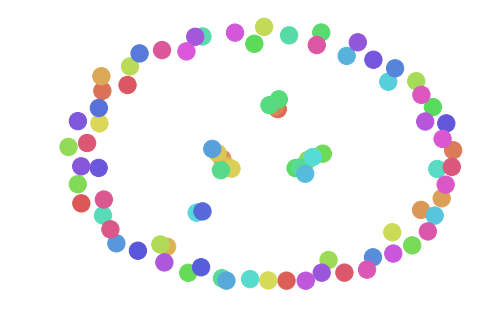

In [36]:
pos_ind = nx.spring_layout(ind)
colors = dict(zip(communities.keys(), sns.color_palette('hls', len(communities.keys()))))
labels = {k: str(k) + ': ' + v for k,v in communities.items()}
nx.draw(ind, pos_ind, node_list=list(colors.keys()), node_color=list(colors.values()))
plt.show()